<AxesSubplot:xlabel='OriginCode', ylabel='offset_minutes'>

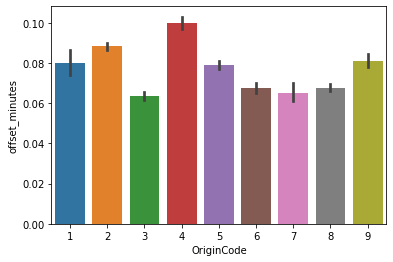

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




# Load the data into a pandas DataFrame

df = pd.read_csv("clean_data.csv")

df.drop(df.columns[0], axis=1, inplace=True)
df = df[df["offset_minutes"] >= 0]
df = df[df["offset_minutes"] <= 500]
df = df.dropna(subset=['time_bin'])




#normalize
df['offset_minutes'] = (df['offset_minutes'] - df['offset_minutes'].min()) / (df['offset_minutes'].max() - df['offset_minutes'].min())
df['Aircraft_Seats'] = (df['Aircraft_Seats'] - df['Aircraft_Seats'].min()) / (df['Aircraft_Seats'].max() - df['Aircraft_Seats'].min())



# Plot a barplot of the average offset_minutes by OriginCode
sns.barplot(x="OriginCode", y="offset_minutes", data=df)

In [23]:
df

,OriginCode,DestinationCode,Aircraft_Seats,Code_letters,time_bin,offset_minutes
0,1,2,0.332056,4,7.0,0.099773
1,1,2,0.332056,4,7.0,0.072562
2,1,2,0.332056,4,7.0,0.024943
3,1,2,0.332056,4,7.0,0.029478
4,1,2,0.332056,4,7.0,0.063492
...,...,...,...,...,...,...
28452,9,8,0.025543,2,20.0,0.179138
28453,9,8,0.038314,2,20.0,0.065760
28454,9,8,0.038314,2,20.0,0.167800
28455,9,8,0.038314,2,20.0,0.124717


<AxesSubplot:xlabel='DestinationCode', ylabel='offset_minutes'>

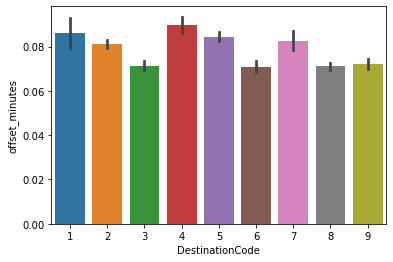

In [24]:
# Plot a barplot of the average offset_minutes by DestinationCode
sns.barplot(x="DestinationCode", y="offset_minutes", data=df)


<AxesSubplot:xlabel='time_bin', ylabel='offset_minutes'>

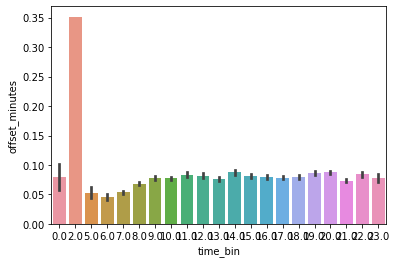

In [25]:
# Plot a boxplot of the offset_minutes by time_bin
sns.barplot(x="time_bin", y="offset_minutes", data=df)



<AxesSubplot:xlabel='Code_letters', ylabel='offset_minutes'>

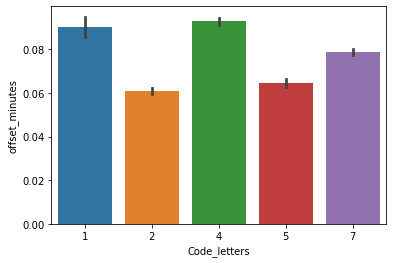

In [26]:
# Plot a violinplot of the offset_minutes by Code_letters
sns.barplot(x="Code_letters", y="offset_minutes", data=df)


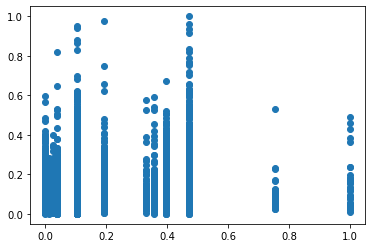

In [27]:

# Plot a scatterplot of the offset_minutes vs. Aircraft_Seats
plt.scatter(df["Aircraft_Seats"], df["offset_minutes"])


<AxesSubplot:xlabel='Aircraft_Seats', ylabel='offset_minutes'>

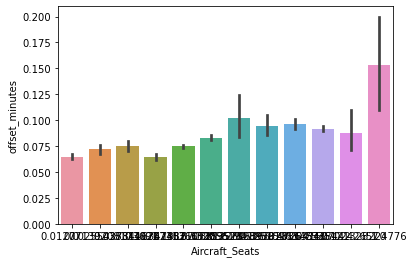

In [28]:
sns.barplot(x="Aircraft_Seats", y="offset_minutes", data=df)


In [29]:


# Calculate the correlation matrix
corr_matrix = df.corr(method='pearson')

# Print the correlation between offset_minutes and all other parameters
print(corr_matrix["offset_minutes"])






OriginCode        -0.069578
DestinationCode   -0.049036
Aircraft_Seats     0.129487
Code_letters       0.029081
time_bin           0.067779
offset_minutes     1.000000
Name: offset_minutes, dtype: float64


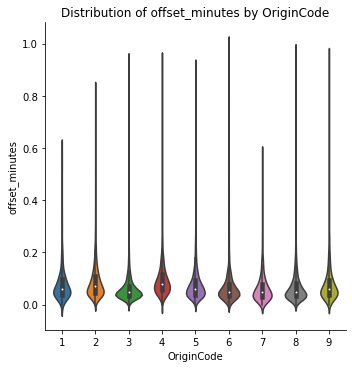

In [30]:
# Create a violin plot for OriginCode
sns.catplot(x="OriginCode", y="offset_minutes", kind="violin", data=df)
plt.title("Distribution of offset_minutes by OriginCode")
plt.show()

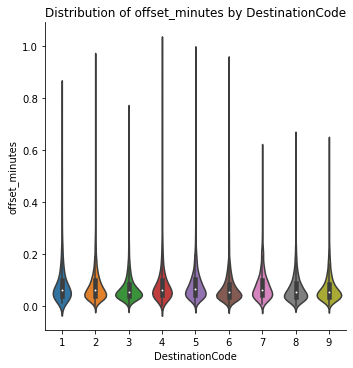

In [31]:
# Create a violin plot for DestinationCode
sns.catplot(x="DestinationCode", y="offset_minutes", kind="violin", data=df)
plt.title("Distribution of offset_minutes by DestinationCode")
plt.show()

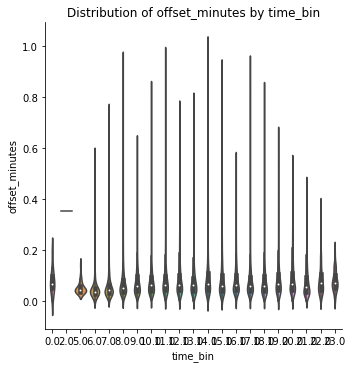

In [32]:
# Create a violin plot for time_bin
sns.catplot(x="time_bin", y="offset_minutes", kind="violin", data=df)
plt.title("Distribution of offset_minutes by time_bin")
plt.show()

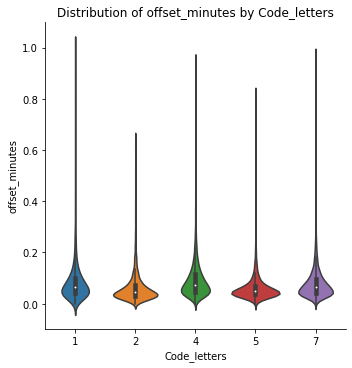

In [33]:
# Create a violin plot for Code_letters
sns.catplot(x="Code_letters", y="offset_minutes", kind="violin", data=df)
plt.title("Distribution of offset_minutes by Code_letters")
plt.show()

C:\Users\edenh\AppData\Local\Temp\ipykernel_21824\368275895.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


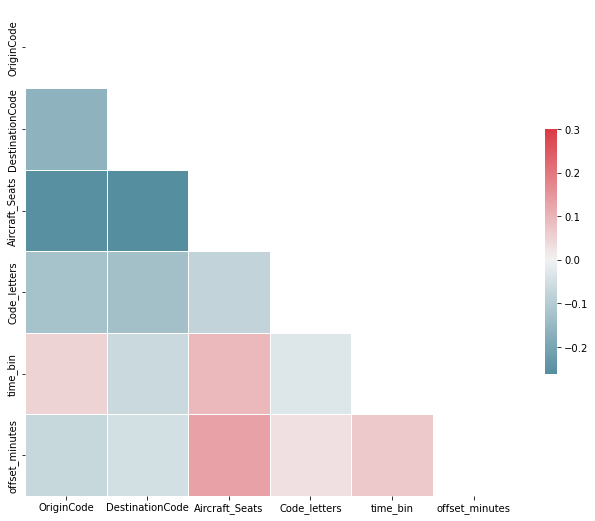

In [34]:
corr=df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()






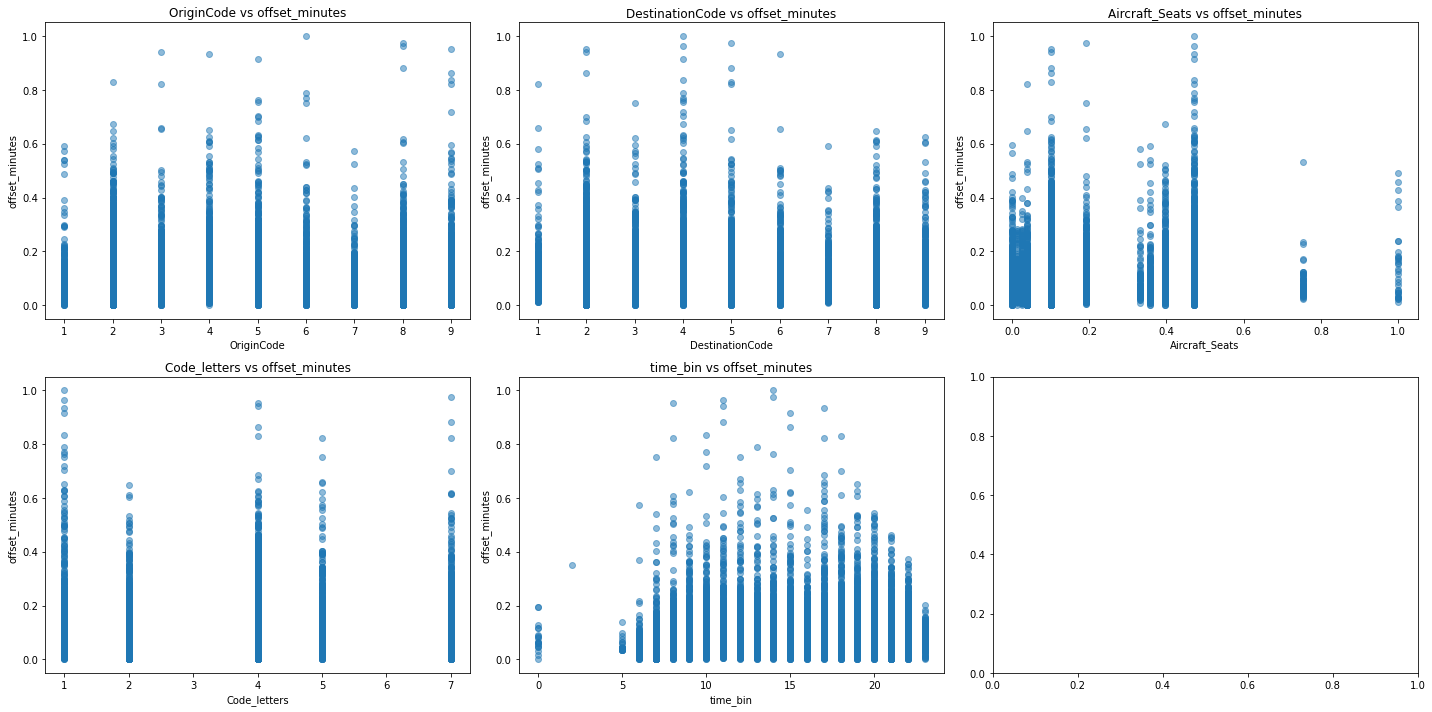

In [35]:

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
ax = axes.ravel()

for i, column in enumerate(df.columns[:-1]):
    ax[i].scatter(df[column], df['offset_minutes'], alpha=0.5)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('offset_minutes')
    ax[i].set_title(f'{column} vs offset_minutes')

plt.tight_layout()
plt.show()
